Experiment No.- 4

* Title- Image filtering in the frequency domain
* Name- Gaurang Mathur
* Roll no.- PB 11
* PRN no.- 1032200428
* Date of performance- 08/02/23

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt, exp

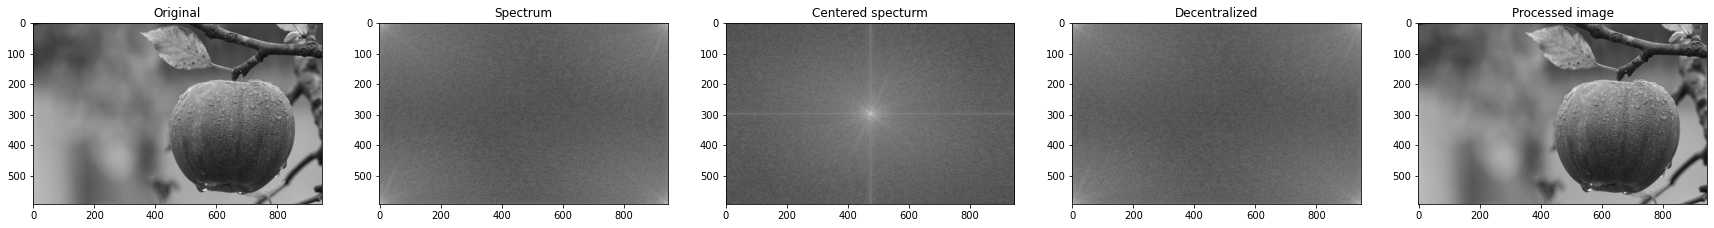

In [ ]:
plt.figure(figsize=(6*5,4*5),constrained_layout=False)

img =cv2.imread("img.jpeg",0)
plt.subplot(151),plt.imshow(img, "gray"), plt.title("Original")

#original =np.fft.fft2(img)
#plt.subplot(152), plt.imshow(np.log(np.abs(original)),"gray"), plt.title("spectrum")

original =np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)),"gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153),plt.imshow(np.log(1+np.abs(center)),"gray"), plt.title("Centered specturm")

inv_center=np.fft.fftshift(center)
plt.subplot(154),plt.imshow(np.log(1+np.abs(inv_center)),"gray"), plt.title("Decentralized")

pro_img= np.fft.ifft2(inv_center)
plt.subplot(155),plt.imshow(np.abs(pro_img),"gray"),plt.title("Processed image")

plt.show()

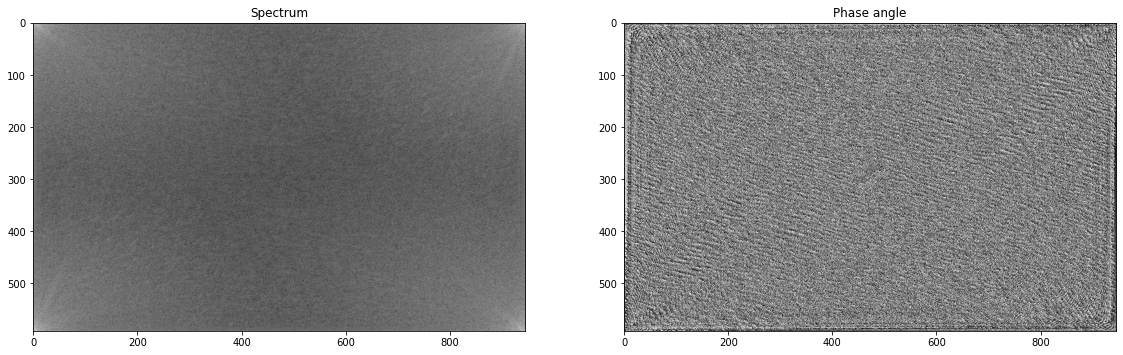

In [ ]:
plt.figure(figsize=(6*5,4*5),constrained_layout=False)

img=cv2.imread("img.jpeg",0)
original =np.fft.fft2(img)
plt.subplot(131),plt.imshow(np.log(np.abs(original)),"gray"),plt.title("Spectrum")
plt.subplot(132),plt.imshow(np.angle(original),"gray"),plt.title("Phase angle")

plt.show()

In [ ]:
def distance (p1,p2):
  return np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
# ** represents power of 2  

## Ideal
def idealFilterLP(D0,imgshape):
  base=np.zeros(imgshape[:2])
  rows,cols=imgshape[:2]
  center=(rows/2,cols/2)

  for x in range(cols):
    for y in range(rows):
      if distance((y,x),center) < D0:
        base[y,x]=1
  return base


def idealFilterHP(D0,imgshape):
  base=np.zeros(imgshape[:2])
  rows,cols=imgshape[:2]
  center=(rows/2,cols/2)

  for x in range(cols):
    for y in range(rows):
      if distance((y,x),center) < D0:
        base[y,x]=0
  return base


## Butterworth
def butterworthLP(D0,imgshape,n):
  base=np.zeros(imgshape[:2])
  rows,cols=imgshape[:2]
  center=(rows/2,cols/2)

  for x in range(cols):
    for y in range(rows):
      base[y,x]=1/(1+distance((y,x),center)/D0)*(2*n)
  return base


def butterworthHP(D0,imgshape,n):
  base=np.zeros(imgshape[:2])
  rows,cols=imgshape[:2]
  center=(rows/2,cols/2)

  for x in range(cols):
    for y in range(rows):
      base[y,x]=1/(1+distance((y,x),center)/D0)*(2*n)
  return base


##guassian
def guassianLP(D0,imgshape):
  base=np.zeros(imgshape[:2])
  rows,cols=imgshape[:2]
  center=(rows/2,cols/2)

  for x in range(cols):
    for y in range(rows):
      base[y,x]=np.exp(((-distance((y,x),center)**2)/2*(D0**2)))
  return base


def guassianHP(D0,imgshape):
  base=np.zeros(imgshape[:2])
  rows,cols=imgshape[:2]
  center=(rows/2,cols/2)

  for x in range(cols):
    for y in range(rows):
      base[y,x]=1-np.exp(((-distance((y,x),center)**2)/2*(D0**2)))
  return base

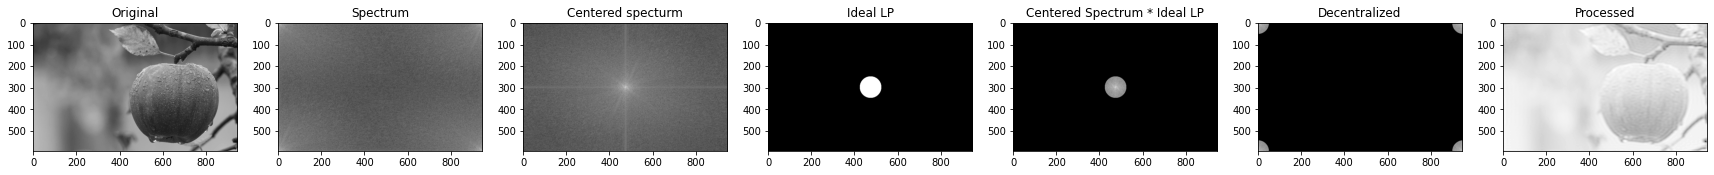

In [ ]:
#Apply ideal low pass filter
plt.figure(figsize=(6*5,4*5),constrained_layout=False)

plt.subplot(171),plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(172), plt.imshow(np.log(1+np.abs(original)),"gray"), plt.title("Spectrum")
plt.subplot(173),plt.imshow(np.log(1+np.abs(center)),"gray"), plt.title("Centered specturm")

LowPass1= idealFilterLP(50,img.shape)
plt.subplot(174),plt.imshow(np.log(1+np.abs(LowPass1)),"gray"), plt.title("Ideal LP")

LowPassCenter1= center*idealFilterLP(50,img.shape)
plt.subplot(175), plt.imshow(np.log(1+np.abs(LowPassCenter1)),"gray"), plt.title("Centered Spectrum * Ideal LP")

LowPass1= np.fft.ifftshift(LowPassCenter1)
plt.subplot(176),plt.imshow(np.log(1+np.abs(LowPass1)),"gray"), plt.title("Decentralized")

inverse_LowPass1= np.fft.ifft2(LowPass1)
plt.subplot(177),plt.imshow(np.log(1+np.abs(inverse_LowPass1)),"gray"), plt.title("Processed")

plt.show()

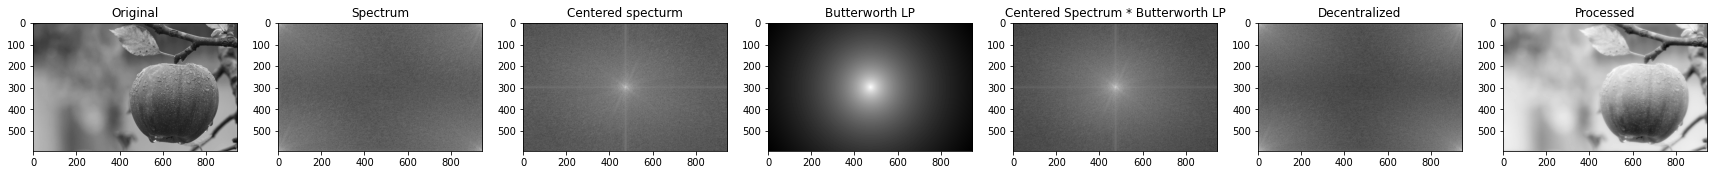

In [ ]:
#Apply butterworth low pass filter
plt.figure(figsize=(6*5,4*5),constrained_layout=False)

plt.subplot(171),plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(172), plt.imshow(np.log(1+np.abs(original)),"gray"), plt.title("Spectrum")
plt.subplot(173),plt.imshow(np.log(1+np.abs(center)),"gray"), plt.title("Centered specturm")

LowPass2= butterworthLP(50,img.shape,20)
plt.subplot(174),plt.imshow(np.log(1+np.abs(LowPass2)),"gray"), plt.title("Butterworth LP")

LowPassCenter2= center*butterworthLP(50,img.shape,20)
plt.subplot(175), plt.imshow(np.log(1+np.abs(LowPassCenter2)),"gray"), plt.title("Centered Spectrum * Butterworth LP")

LowPass2= np.fft.ifftshift(LowPassCenter2)
plt.subplot(176),plt.imshow(np.log(1+np.abs(LowPass2)),"gray"), plt.title("Decentralized")

inverse_LowPass2= np.fft.ifft2(LowPass2)
plt.subplot(177),plt.imshow(np.log(1+np.abs(inverse_LowPass2)),"gray"), plt.title("Processed")

plt.show()

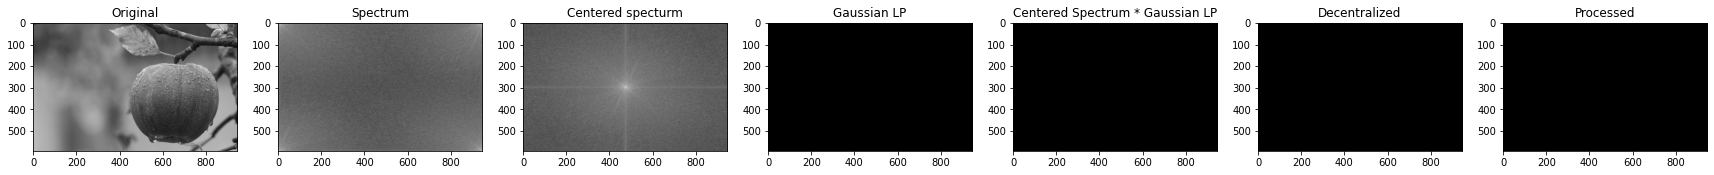

In [ ]:
#Apply gaussian low pass filter
plt.figure(figsize=(6*5,4*5),constrained_layout=False)

plt.subplot(171),plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(172), plt.imshow(np.log(1+np.abs(original)),"gray"), plt.title("Spectrum")
plt.subplot(173),plt.imshow(np.log(1+np.abs(center)),"gray"), plt.title("Centered specturm")

LowPass3= guassianLP(50,img.shape)
plt.subplot(174),plt.imshow(np.log(1+np.abs(LowPass3)),"gray"), plt.title("Gaussian LP")

LowPassCenter3= center*guassianLP(50,img.shape)
plt.subplot(175), plt.imshow(np.log(1+np.abs(LowPassCenter3)),"gray"), plt.title("Centered Spectrum * Gaussian LP")

LowPass3= np.fft.ifftshift(LowPassCenter3)
plt.subplot(176),plt.imshow(np.log(1+np.abs(LowPass3)),"gray"), plt.title("Decentralized")

inverse_LowPass3= np.fft.ifft2(LowPass3)
plt.subplot(177),plt.imshow(np.log(1+np.abs(inverse_LowPass3)),"gray"), plt.title("Processed")

plt.show()

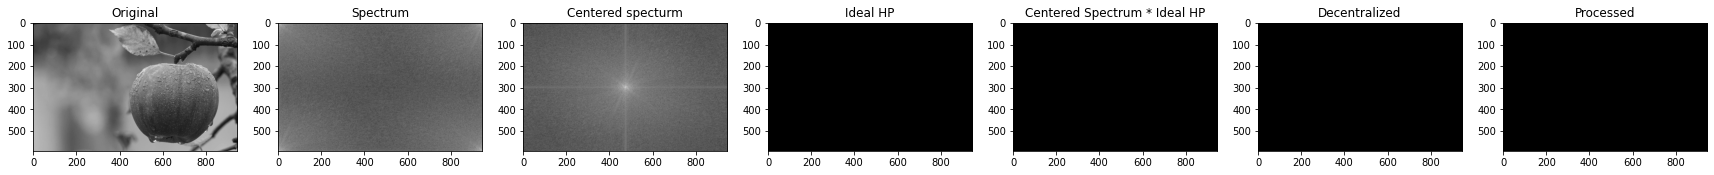

In [ ]:
#Apply ideal high pass filter
plt.figure(figsize=(6*5,4*5),constrained_layout=False)

plt.subplot(171),plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(172), plt.imshow(np.log(1+np.abs(original)),"gray"), plt.title("Spectrum")
plt.subplot(173),plt.imshow(np.log(1+np.abs(center)),"gray"), plt.title("Centered specturm")

HighPass1= idealFilterHP(50,img.shape)
plt.subplot(174),plt.imshow(np.log(1+np.abs(HighPass1)),"gray"), plt.title("Ideal HP")

HighPassCenter1= center*idealFilterHP(50,img.shape)
plt.subplot(175), plt.imshow(np.log(1+np.abs(HighPassCenter1)),"gray"), plt.title("Centered Spectrum * Ideal HP")

HighPass1= np.fft.ifftshift(HighPassCenter1)
plt.subplot(176),plt.imshow(np.log(1+np.abs(HighPass1)),"gray"), plt.title("Decentralized")

inverse_HighPass1= np.fft.ifft2(HighPass1)
plt.subplot(177),plt.imshow(np.log(1+np.abs(inverse_HighPass1)),"gray"), plt.title("Processed")

plt.show()

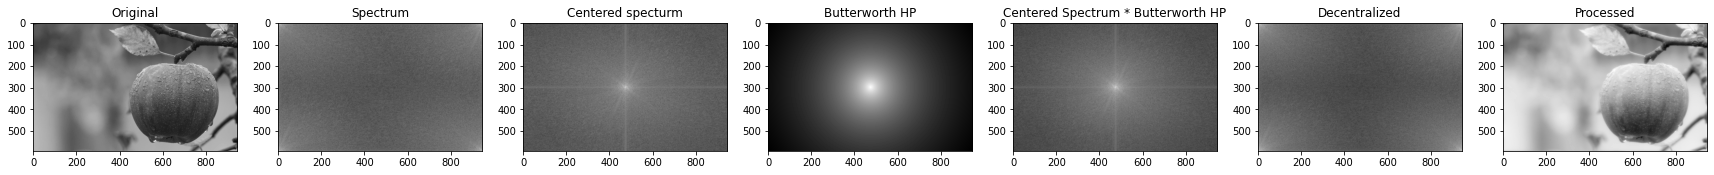

In [ ]:
#Apply butterworth high pass filter
plt.figure(figsize=(6*5,4*5),constrained_layout=False)

plt.subplot(171),plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(172), plt.imshow(np.log(1+np.abs(original)),"gray"), plt.title("Spectrum")
plt.subplot(173),plt.imshow(np.log(1+np.abs(center)),"gray"), plt.title("Centered specturm")

HighPass2= butterworthHP(50,img.shape,20)
plt.subplot(174),plt.imshow(np.log(1+np.abs(HighPass2)),"gray"), plt.title("Butterworth HP")

HighPassCenter2= center*butterworthHP(50,img.shape,20)
plt.subplot(175), plt.imshow(np.log(1+np.abs(HighPassCenter2)),"gray"), plt.title("Centered Spectrum * Butterworth HP")

HighPass2= np.fft.ifftshift(HighPassCenter2)
plt.subplot(176),plt.imshow(np.log(1+np.abs(HighPass2)),"gray"), plt.title("Decentralized")

inverse_HighPass2= np.fft.ifft2(HighPass2)
plt.subplot(177),plt.imshow(np.log(1+np.abs(inverse_HighPass2)),"gray"), plt.title("Processed")

plt.show()

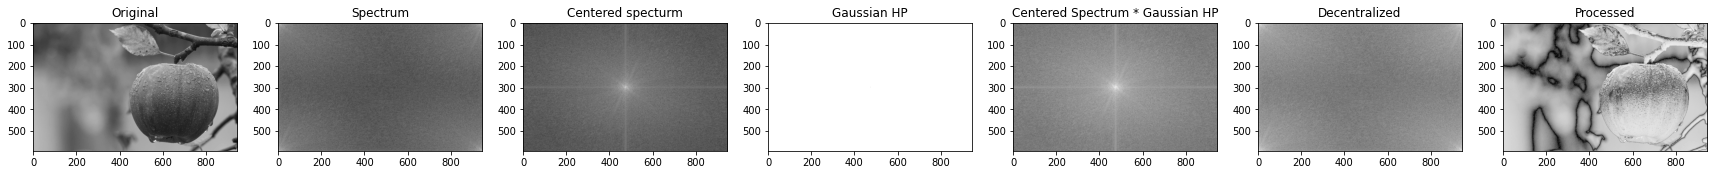

In [ ]:
#Apply gaussian high pass filter
plt.figure(figsize=(6*5,4*5),constrained_layout=False)

plt.subplot(171),plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(172), plt.imshow(np.log(1+np.abs(original)),"gray"), plt.title("Spectrum")
plt.subplot(173),plt.imshow(np.log(1+np.abs(center)),"gray"), plt.title("Centered specturm")

HighPass3= guassianHP(50,img.shape)
plt.subplot(174),plt.imshow(np.log(1+np.abs(HighPass3)),"gray"), plt.title("Gaussian HP")

HighPassCenter3= center*guassianHP(50,img.shape)
plt.subplot(175), plt.imshow(np.log(1+np.abs(HighPassCenter3)),"gray"), plt.title("Centered Spectrum * Gaussian HP")

HighPass3= np.fft.ifftshift(HighPassCenter3)
plt.subplot(176),plt.imshow(np.log(1+np.abs(HighPass3)),"gray"), plt.title("Decentralized")

inverse_HighPass3= np.fft.ifft2(HighPass3)
plt.subplot(177),plt.imshow(np.log(1+np.abs(inverse_HighPass3)),"gray"), plt.title("Processed")

plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe373005cd0>,
 Text(0.5, 1.0, 'Gaussian'))

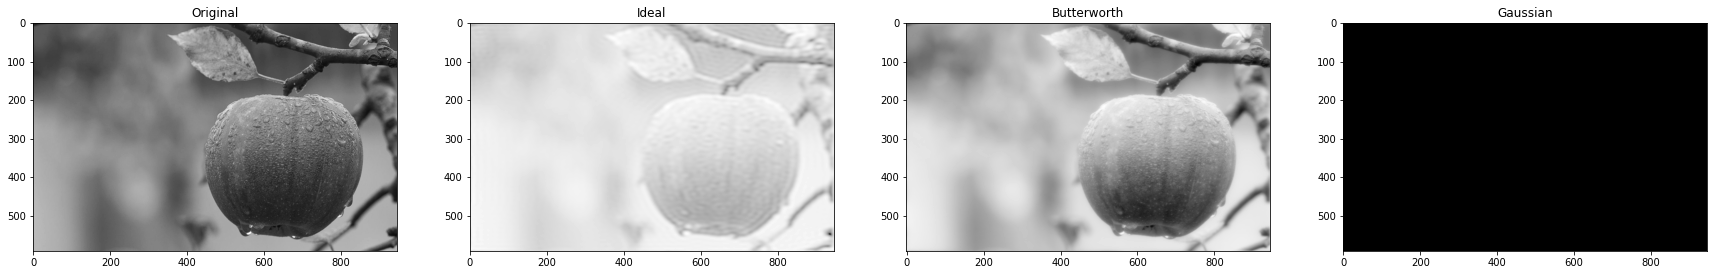

In [ ]:
# Low pass filter images
plt.figure(figsize=(6*5,4*5),constrained_layout=False)

plt.subplot(141),plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(142),plt.imshow(np.log(1+np.abs(inverse_LowPass1)),"gray"), plt.title("Ideal")
plt.subplot(143),plt.imshow(np.log(1+np.abs(inverse_LowPass2)),"gray"), plt.title("Butterworth")
plt.subplot(144),plt.imshow(np.log(1+np.abs(inverse_LowPass3)),"gray"), plt.title("Gaussian")

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe374846bb0>,
 Text(0.5, 1.0, 'Gaussian'))

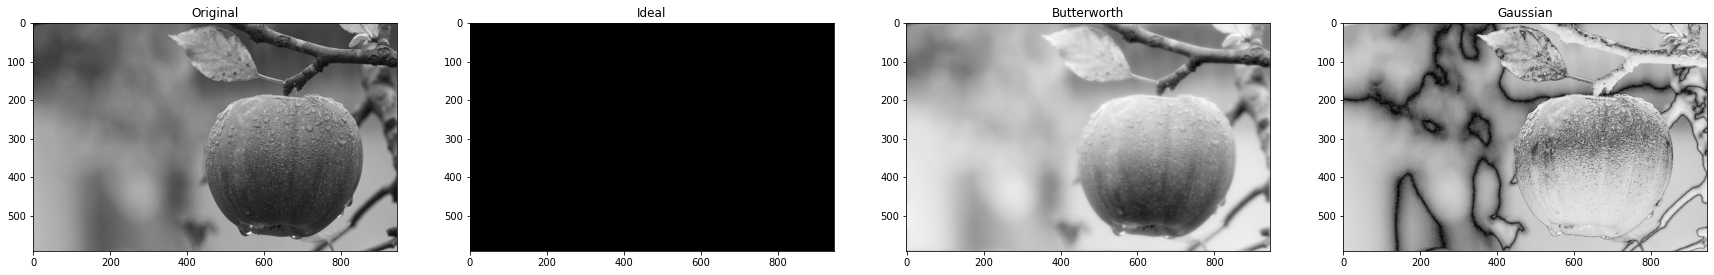

In [ ]:
# High pass filter images
plt.figure(figsize=(6*5,4*5),constrained_layout=False)

plt.subplot(141),plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(142),plt.imshow(np.log(1+np.abs(inverse_HighPass1)),"gray"), plt.title("Ideal")
plt.subplot(143),plt.imshow(np.log(1+np.abs(inverse_HighPass2)),"gray"), plt.title("Butterworth")
plt.subplot(144),plt.imshow(np.log(1+np.abs(inverse_HighPass3)),"gray"), plt.title("Gaussian")

**Result and Conclusion-** In this experiment, we applied low and high pass filters on a gray scale image. We applied ideal, butterworth and gaussian types of high pass and low pass filter. Gaussian filter is best for removing ringing effect.

 Post Lab Questions-


1.   Determine IDCT of the following 2x2 matrix
      300 100
      0    0

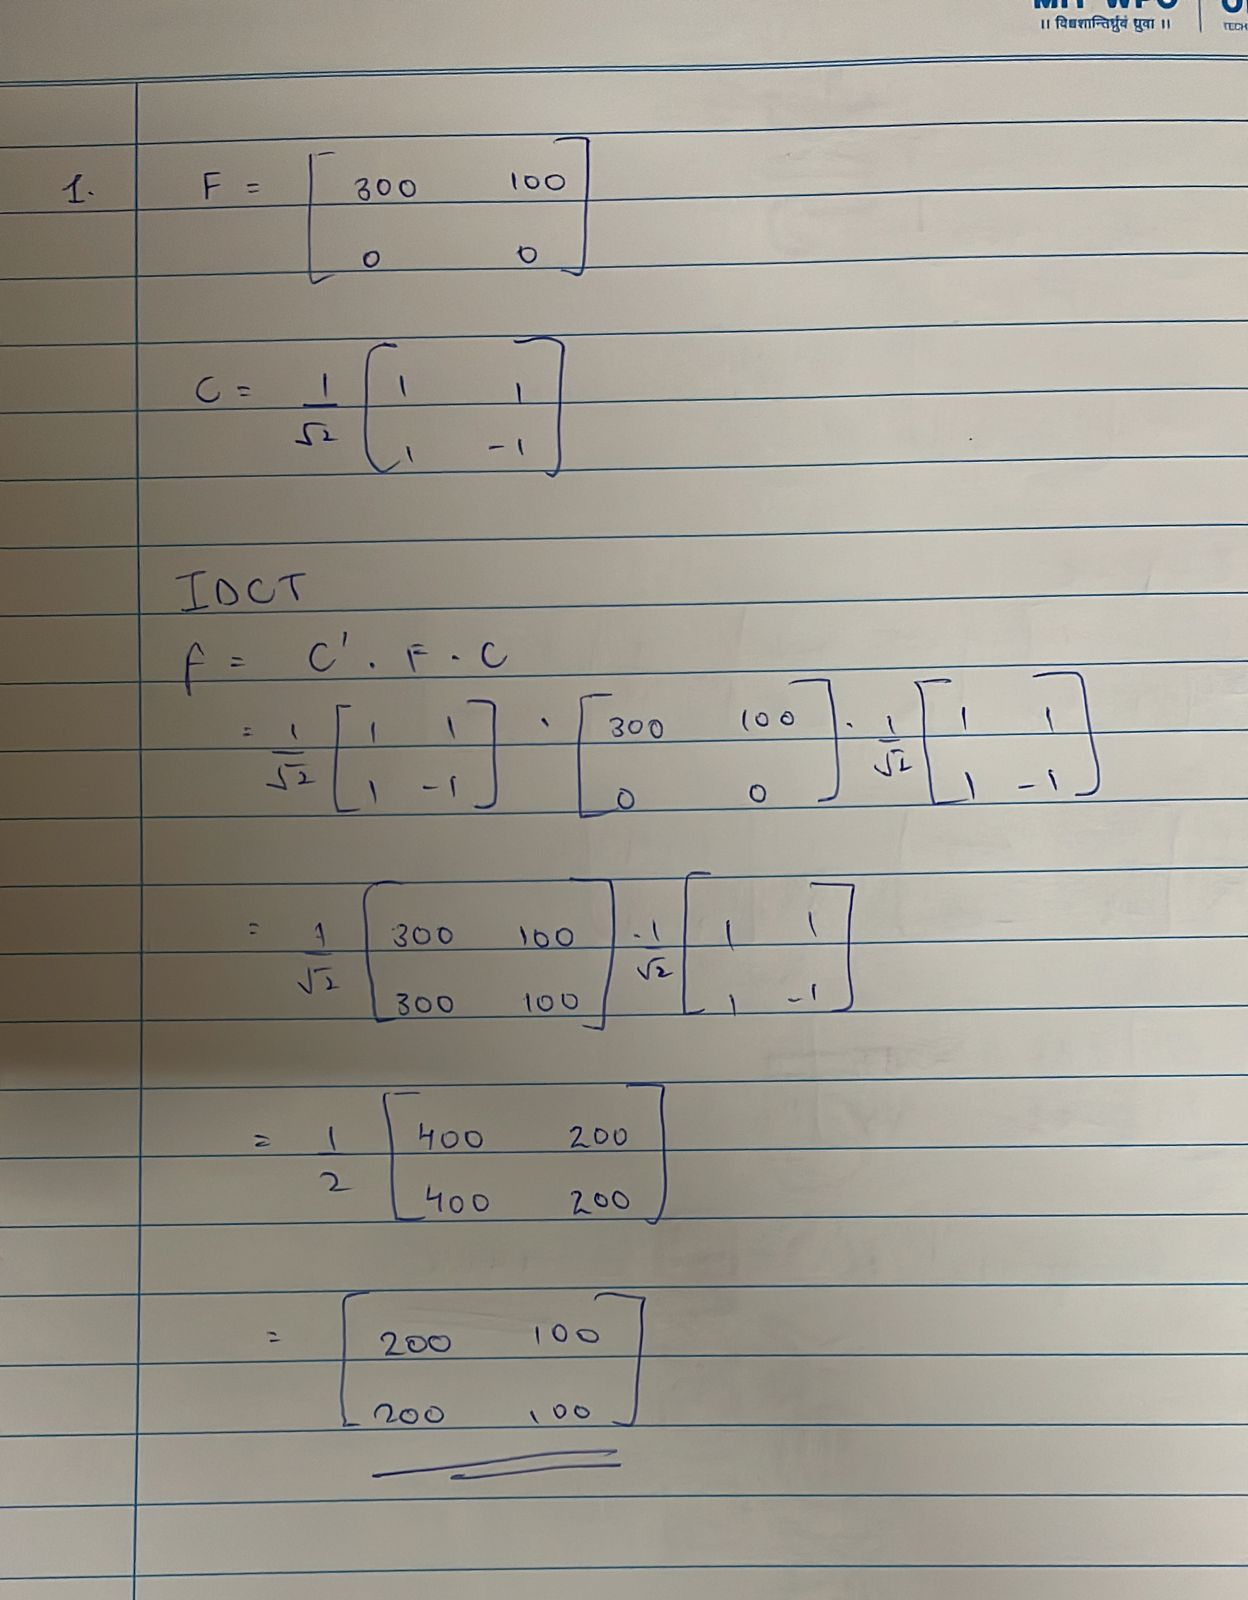
---

2.   What is DC coefficient of DFT ofthe following 2x2 matrix?

15 100
18 150

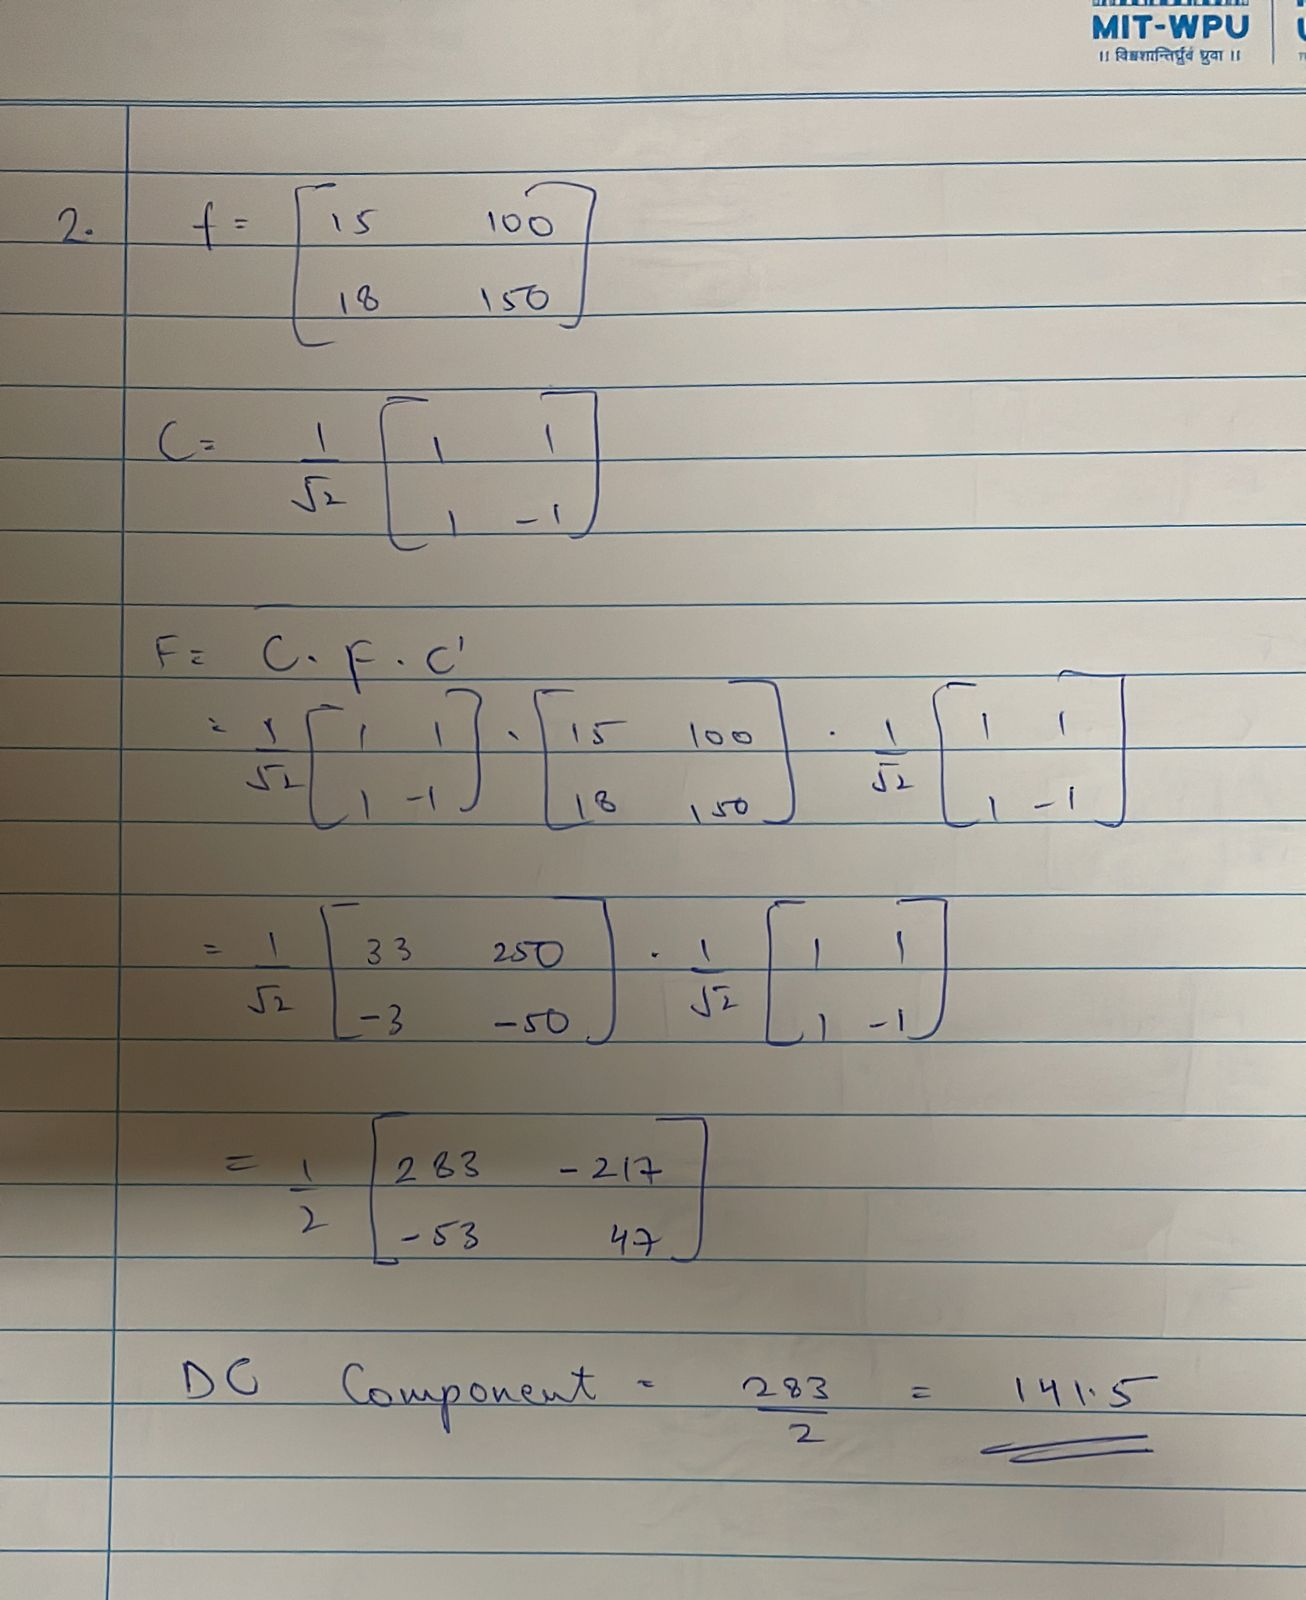

---

